In [15]:
import numpy as np
nLon = 320
nLat = 384
shape = nLat, nLon
rng = np.random.default_rng(seed=42)
lon = rng.uniform(low=0, high=360, size=shape)
lat = rng.uniform(low=-90, high=90, size=shape)
data = np.cos(np.deg2rad(lon)) + np.sin(np.deg2rad(lat))

In [5]:
from scipy.interpolate import griddata

In [23]:
%%time
rlon = np.arange(0, 360)
rlat = np.arange(-90, 90)
rdata = griddata((lon.flat, lat.flat), data.flat, (rlon[None, :], rlat[:, None]))

CPU times: user 746 ms, sys: 23 ms, total: 769 ms
Wall time: 769 ms


In [18]:
%matplotlib inline

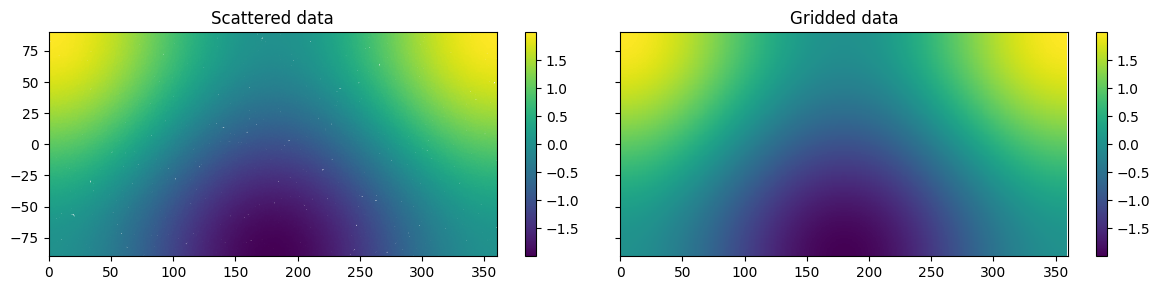

In [28]:
import matplotlib.pyplot as plt

f, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 3), sharex=True, sharey=True)

h = ax.scatter(lon, lat, c=data, s=1)
plt.colorbar(h, ax=ax)
ax.set_title("Scattered data")

h = ax2.pcolormesh(rlon, rlat, rdata)
plt.colorbar(h, ax=ax2)
ax2.set_title("Gridded data")

ax.set_xlim(0, 360)
ax.set_ylim(-90, 90)

f.tight_layout()